# Chapter19. 딥러닝 구현
## 19.1. 딥러닝 개요
### 19.1.1. 딥러닝 체험

   - 딥러닝(심층학습)의 가장 기본 알고리즘인 심층신경망 DNN - Deep Neural Network 
   - 목표 : 필기체 숫자 이미지 데이터의 숫자를 판별하는 코드 작성
   - 라이브러리 : Keras, Tensorflow
        (1) Tensorflow : Google Deep Learning Library
        (2) Keras : High Level API for Tensorflow wrapper labrary

11493376/11490434 [==============================] - 228s 20us/step
Train on 6000 samples, validate on 1000 samples
Epoch 1/5
6000/6000 [==============================] - 0s 36us/step - loss: 2.4011 - acc: 0.1400 - val_loss: 2.0834 - val_acc: 0.4580
Epoch 2/5
6000/6000 [==============================] - 0s 23us/step - loss: 2.1272 - acc: 0.2387 - val_loss: 1.8930 - val_acc: 0.6000
Epoch 3/5
6000/6000 [==============================] - 0s 23us/step - loss: 1.9194 - acc: 0.3567 - val_loss: 1.7224 - val_acc: 0.6430
Epoch 4/5
6000/6000 [==============================] - 0s 21us/step - loss: 1.7383 - acc: 0.4593 - val_loss: 1.5552 - val_acc: 0.7070
Epoch 5/5
6000/6000 [==============================] - 0s 22us/step - loss: 1.5722 - acc: 0.5405 - val_loss: 1.4059 - val_acc: 0.7340


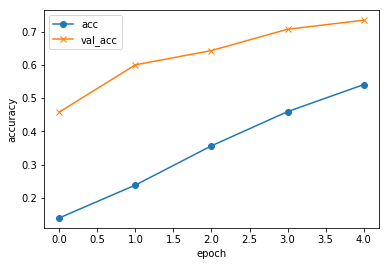

In [11]:
# 19-1
# 아래 코드를 실행하여 epoch수가 높아짐에 따라 훈련 데이터의 정확도 acc와 테스트 데이터의 정확도 val_acc가 올라가는 모습확인
#--------------------------------------------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim = 784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate = 0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr = 0.1)
model.compile(
    optimizer = sgd,
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

# epochs 수를 5로 합니다.
history = model.fit(
    X_train, y_train, batch_size = 500, epochs = 5, verbose = 1, validation_data = (X_test, y_test)
)

# acc와 val_acc 플롯
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()



### 19.1.2. 딥러닝이란(1)
   - 딥러닝 : 동물의 신경망을 참고로 한 심층 신경망 모델을 사용하여 분류나 회귀
   - 신경망에 착상했으나, 뇌의 신경망 재현을 목표로 하지 않고 순수하게 정밀도를 높이는 연구 (머신러닝의 한 방법)

### 19.1.3. 딥러닝이란(2)
   - 발상 : 1950년부터 존재. 뉴런만으로는 복잡한 문제해결 불가능. 여러층을 구축하여 (심층 신경망)복잡한 문제를 다룰수 있게됨
   
### 19.1.4. 딥러닝을 이용한 분류의 흐름
   ####      1. 네트워크 모델 작성하기
   ####      2. 모델에 훈련용 데이터를 부여하고 학습시키기
   ####      3. 분류할 데이터를 모델에 전달하기

## 19.2. 필기체 숫자의 분류
### 19.2.1. 분류의 흐름
   - Keras라는 파이썬 라이브러리를 사용한 신경망 모델의 구현 : 필기체 숫자 분류
   - 작업의 흐름
       (1) 데이터 준비
       (2) 신경망 모델 구축
       (3) 모델에 데이터를 전달해서 학습시킴
       (4) 모델의 분류 정확도 평가
            -> 실제 필기체 숫자의 이미지를 전달하여 예측된 값을 확인

### 19.2.2. 심층 신경망
   - 입력층 : 입력을 맡은 층
   - 출력층 : 출력하는 층
   - 은닉층 : 입력층과 출력층 사이
   - MNIST 모델 : 입력에 28x28의 흑백 이미지를 일차원 배열로 평탄화flattening한 784차원 벡터를 전달
   - 출력 : 0 ~ 9 의 10개 클래스로 분류하므로, 출력 유닛의 수는 10이 된다 : 출력은 10차원의 벡터임
   - 세로로 늘어선 벡터 하나하나의 요소를 [노드]라고 하며, 그 차원 수를 [노드 수]라고 한다.
   - (ex) 정답이 7인 이미지 데이터에 대한 지도 데이터 t는 클래스 라벨이 7인 곳만 값이 1이고, 그 외에는 0이된다.
   - 이같은 데이터를 원한 벡터, 이러한 방법을 One hot Encoding/Vector라고 한다.

### 19.2.3. Keras 도입 
   - Keras 는 Tensorflow의 래퍼 라이브러리.

### 19.2.4. 데이터 준비
   - MNIST 데이터셋 사용

In [2]:
# 19-3 Keras에서 MNIST import - Keras코드를 실행하여 MNIST Dataset Download하기 (아래구문)
# from keras.datasets import mnist
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# 19-4 
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

# -----------------------------
# 다음 행을 변경하세요
print(X_train, y_train, X_test, y_test)
print("=======================================================")
print("X_train.shape :", X_train.shape, "\ny_train.shape :", y_train.shape, "\n",X_test.shape, y_test.shape)
# -----------------------------



[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [5 0 4 ... 5 6 8] [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0

### 19.2.5. 모델 생성
   - 먼저, Keras로 모델을 관리하는 인스턴스를 만들고, add() 메서드로 한 층씩 정의한다.
   
   - 먼저, 인스턴스를 만든다
         model = Sequential()
   - add()메서드를 사용하여 모델을 한 층씩 정의한다. 유닛 수가 128인 전결합층을 정의하면,
         model.add(Dense(128))
   - 각 전결합층의 출력은 다음처럼 [활성화 함수]를 적용 : sigmoid, ReLU함수 relu등
         model.add(Activation("sigmoid"))
   - 마지막으로, 컴파일 메서드 - compile()을 이용하여 어떠한 학습을 실시할지 설정하면 모델 생성 종료
         model.compile(optimizer=sgd, loss="categorical_crossentropy"metrics="accuracy"])

In [10]:
# 19-6

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]    # 6000개는 training용 데이터로
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]       # 1000개는 test용 데이터로
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()

# 입력 유닛 수는 784개이며, 첫 번째 전결합층의 출력 유닛 수는 256입니다
model.add(Dense(256, input_dim = 784))
model.add(Activation("sigmoid"))

# 두 번째 전결합층의 출력 유닛 수는 10입니다.
# 여기에 코드를 작성하세요
model.add(Dense(128))
model.add(Activation("relu"))

# 세 번째 전결합층(출력층)의 출력 유닛 수는 10개입니다.
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(
    optimizer = "sgd", 
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

# 모델 구조를 출력합니다.
plot_model(model, "model125.png", show_layer_names=False)

# 모델 구조를 시각화합니다.
image = plt.imread("model125.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.show()

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [13]:
# 위예제를 다시 해답에서 복사해와도 마찬가지. 문제확인필요
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
# 입력 유닛 수는 784개이며, 첫번째 전결합층의 출력 유닛 수는 256입니다
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

# 두번째 전결합층의 출력 유닛 수는 10입니다
# ---------------------------
# 여기에 코드를 작성하세요
model.add(Dense(128))
model.add(Activation("relu"))
# ---------------------------

# 세번째 전결합층(출력층)의 출력 유닛 수는 10개입니다
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# 모델 구조를 출력합니다
plot_model(model, "model125.png", show_layer_names=False)
# 모델 구조를 시각화합니다
image = plt.imread("model125.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.show()

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

### 19.2.6. 모델 학습
   - 모델에 훈련 데이터를 전달하여 학습을 실히. fit()메서드를 사용함
   - model.fit(X_train, y_train, verbose=1, epochs=3)
        * X_train : 학습용 입력 데이터,
        * y_train : 학습용 지도 데이터,
        * verbose : 지정한 숫자로 학습의 진척상황 표시 [1] 학습진척상황 출력, [0] 출력하지 않음
   - fit()메서드 : 학습용 데이터를 순서대로 모델에 입력후 출력 및 지도데이터 간의 차이가 작아지도록 각 뉴런 가중치를 갱신, 오차 감소, 모델의 예측 정확도가 향상됨

Epoch 1/3
6000/6000 [==============================] - 1s 84us/step - loss: 2.0674 - acc: 0.4543
Epoch 2/3
6000/6000 [==============================] - 0s 52us/step - loss: 1.6602 - acc: 0.7025
Epoch 3/3
6000/6000 [==============================] - 0s 48us/step - loss: 1.3464 - acc: 0.7662


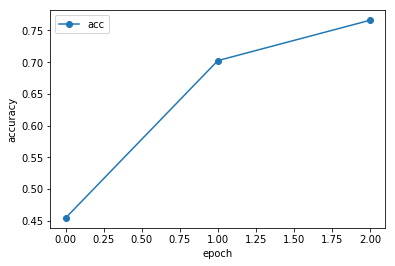

In [15]:
# 19-8 공란을 채워 학습을 진행하세요. 정확도 acc가 점차적으로 오르는지 확인하세요
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras import optimizers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# 여기에 코드를 작성하세요
#-----------------------
history = model.fit(X_train, y_train, verbose=1, epochs=3)

# acc와 val_acc 플롯
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()
              
              

### 19.2.7. 모델 평가
   - 과학습 방지를 위해, 훈련에 사용하지 않았던 테스트 데이터를 사용해서 모델로 분류하고, 모델의 평가를 실시
   - 모델에 테스트 데이터를 전달했을 떄의 분류 정확도를 일반화 정확도라 한다.
   - 일반화 정확도의 계산을 evaluate() 메서드를 사용한다.
   
        score = model.evaluate(X_test, y_test, verbose=1)
   - evaluate() 메서드는 손실 함수의 값과 정확도를 얻을 수 있으면, 위 예제의 경우 score에 모두 저장된다.
   - 테스트 데이터는 일반화 정확도의 계산용

In [16]:
# 19-10: model.evaluate()를 사용하여 일반화 정확도를 평가할 수 있다
#----------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(
    optimizer = "sgd",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train, y_train)

# 여기에 코드를 작성하세요
#-------------------------------------
score = model.evaluate(X_test, y_test, verbose=1)

print("evaluate loss : {0[0]}\nevaluate add : {0[1]}".format(score))


Epoch 1/1
1000/1000 [==============================] - 0s 49us/step
evaluate loss : 1.8852676944732667
evaluate add : 0.565


### 19.2.8. 모델에 의한 분류
   - model의 predict()메서드로 예측치를 얻을 수 있다.
   - 예 : X_test의 첫 사진 1장의 숫자를 예측하려면, (차원에 주의)
        pred = np.argmax(model.predict(X_test [0]))
        print("예측치 :"+ str(pred))
   - predict()메서드의 출력은 10차원이므로, argmax()함수로 가장 큰 값을 반환하는 뉴런의 위치를 취급한다.

Epoch 1/1
6000/6000 [==============================] - 0s 72us/step - loss: 2.1244 - acc: 0.3782
evaluate loss : 1.9392783622741698
evaluate acc: 0.52


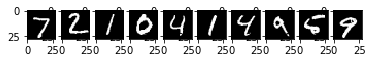

[7 6 1 6 4 1 4 7 4 7]


In [21]:
# 19-12 : 학습을 실시한 다음 test[0:10]의 예측치를 출력하세요
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(
    optimizer = "sgd",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss : {0[0]}\nevaluate acc: {0[1]}".format(score))

# 테스트 데이터의 첫 10장을 표시합니다
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), "gray")
plt.show()

# X_test의 첫 10장의 예측된 라베을 표시합니다.
# 여기에 코드를 작성하세요
# ------------------------------------------------------
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

# 연습문제
   -이제부터 필기체 문자 인식에 도전

In [22]:
# 19-14 : 다음은 MNIST분류 코드입니다. 코드를 읽고 모델의 생성, 학습, 분류가 어느 행에서 이루어지는지 주석을 달아 보세요

Epoch 1/1
1000/1000 [==============================] - 0s 84us/step
evaluate loss : 1.6614773607254028
evaluate acc: 0.643


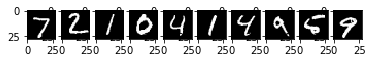

[7 2 1 0 4 1 4 4 2 7]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
%matplotlib inline

# 데이터셋을 가져옵니다
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:1000]

# 1. 모델을 생성합니다.
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# 2. 모델을 학습시킵니다.
model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=1)
print("evaluate loss : {0[0]}\nevaluate acc: {0[1]}".format(score))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), "gray")
plt.show()

# 3. 모델로 분류합니다.
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

## Summary (with Keras)

   - 모델을 생성하려면, 
   - 모델을 관리하는 인스턴스를 만들고,
   - add()메서드로 한 층씩 층을 추가하고, 
   - compile() 컴파이 메서드로 어떠한 학습을 실시할지 설정을 완료
   - model.fit(학습 데이터, 지도 데이터)로 학습시키고
   - model.predict를 이용하여 예측치를 얻을 수 있다.